# XBeach profiles comparisons between scenarios

First we need to load the IPython libraries:

In [1]:
%pylab inline
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


# Loading XBeach output for each scenario

The netcdf file is located in the same location as your input files, we use the IPython netCDF4 functionality to load the data file. Using the `variables.keys()`, we can see all the parameters outputed by XBeach

In [2]:
ref_data = netCDF4.Dataset('reference/xboutput.nc')
shore_data = netCDF4.Dataset('shoreface/xboutput.nc')
beach_data = netCDF4.Dataset('beach/xboutput.nc')
banquette_data = netCDF4.Dataset('banquette/xboutput.nc')

# Get scenarios main output for comparisons

In [3]:
# Export the stored time values
times = ref_data.variables['globaltime'][:]

# Export the X-axis values of the profile
refX = ref_data.variables['globalx'][0,:]
shoreX = shore_data.variables['globalx'][0,:]
beachX = beach_data.variables['globalx'][0,:]
banquetteX = banquette_data.variables['globalx'][0,:]

# Export the bed elevation for each scenario
ref_bed = ref_data.variables['zb'][:,0,:]
shore_ref = shore_data.variables['zb'][:,0,:]
beach_ref = beach_data.variables['zb'][:,0,:]
banquette_ref = banquette_data.variables['zb'][:,0,:]

In [4]:
axisX = [refX,shoreX,beachX,banquetteX]
bed = [ref_bed,shore_ref,beach_ref,banquette_ref]

## Check parameters shape

The shape of an array gives us the dimension of the dataset we are looking at:

In [5]:
print 'shape time values: ',times.shape
print 'shape X-axis profile reference model: ',refX.shape
print 'shape X-axis profile shoreface model: ',shoreX.shape
print 'shape X-axis profile beach model: ',beachX.shape
print 'shape X-axis profile banquette model: ',banquetteX.shape
print 'shape bed elevation reference model: ',ref_bed.shape
print 'shape bed elevation shoreface model: ',shore_ref.shape
print 'shape bed elevation beach model: ',beach_ref.shape
print 'shape bed elevation banquette model: ',banquette_ref.shape

shape time values:  (2159,)
shape X-axis profile reference model:  (112,)
shape X-axis profile shoreface model:  (115,)
shape X-axis profile beach model:  (117,)
shape X-axis profile banquette model:  (117,)
shape bed elevation reference model:  (2159, 112)
shape bed elevation shoreface model:  (2159, 115)
shape bed elevation beach model:  (2159, 117)
shape bed elevation banquette model:  (2159, 117)


# Plotting beach profile at a given time

To plot the model result for a given time we can define a function that will handle the process automatically. To define a function in IPython we use the following keyword: `def`

In [6]:
for i in range(4):
    #print 'minimum distance:',axisX[i].min()
    print 'maximum distance:',axisX[i].max()

maximum distance: 2137.6255
maximum distance: 2137.9541
maximum distance: 2137.4099
maximum distance: 2137.6254


In [69]:
def profile_comparison(FID):
    
    names=[]
    
    # Number of profile to plot (start at 0)
    nbframe = 4
    
    # Set figure size
    fig, ax1 = plt.subplots(figsize=(15,7), dpi=80) 
    axes = plt.gca()
    
    # Set extend of visualisation domain
    axes.set_xlim([2070,2080])
    axes.set_ylim([10,11])

  
    # Define bed elevation for given frame ID
    for i in range(nbframe):
        
        # Define the base of the model
        base = np.zeros(len(axisX[i]))
        base.fill(-12)
        bed_data = bed[i][FID,:]
        if FID == 0:
            ax1.plot(axisX[i][:],bed_data,'-',linewidth=4.0)
            names.append('initial bed at '+str(int(times[FID]))+'s for model '+str(i))
        else:
            ax1.plot(axisX[i][:],bed_data,'--',linewidth=4.0)
            names.append('final bed at '+str(int(times[FID]))+'s for model '+str(i))
    
    # Axes definitions
    tlt='Zoom of profile comparisons between the different scenarios'
    plt.title(tlt, fontsize=12)
    ax1.set_ylabel('elevation [m]', fontsize=12)
    ax1.set_xlabel('lenght [m]', fontsize=12)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    plt.setp(ax1.get_yticklabels(), fontsize=10)
    
    # Set legend
    ax1.legend(names,loc='upper left', fontsize=11)
    plt.show()

### Initial condition before storm

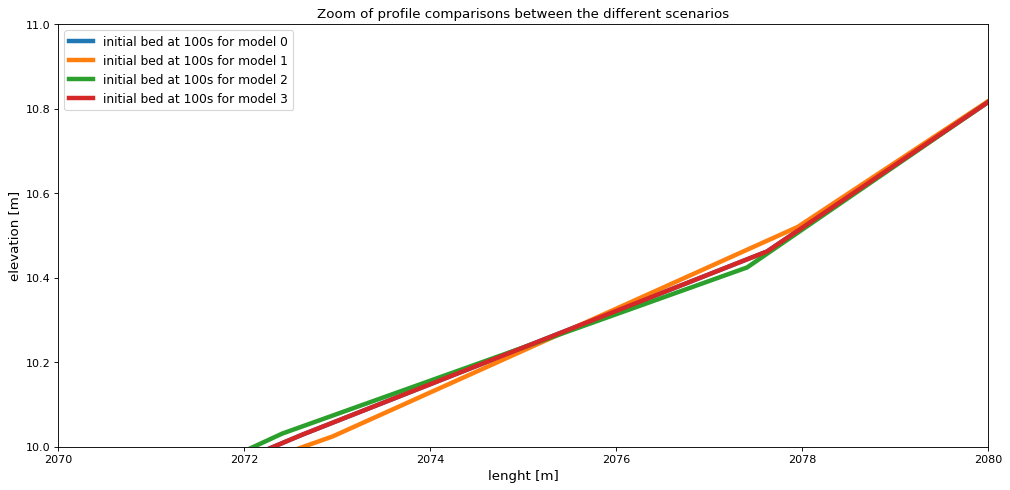

In [70]:
profile_comparison(0)

### Final condition after storm

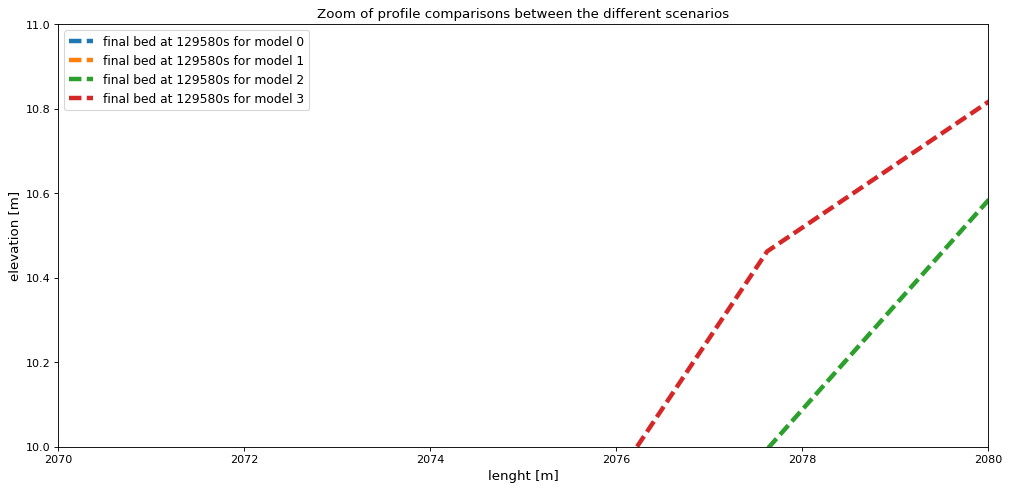

In [71]:
profile_comparison(2158)

# Comparisons between models

First we interpolate the dataset to get the same dimensions for each scenarios variables:

In [53]:
# Define a x-axis vector
x = np.linspace(1400,1700,1  50)
dx = x[1]-x[0]

# Define the initial (bed0) and final (bedf) elevation of the bed on this new x-axis
bed0 = []
bedf = []
for i in range(4):
    interpFunc1 = interp1d(axisX[i], bed[i][0,:], kind='cubic')
    bed0.append(interpFunc1(x))
    interpFunc2 = interp1d(axisX[i], bed[i][-1,:], kind='cubic')
    bedf.append(interpFunc2(x))

Compute the differences between the models for the initial state:

In [56]:
# Thickness differences
th1 = np.sum(bed0[1]-bed0[0])
#th2 = np.sum(bed0[2]-bed0[0])
#th3 = np.sum(bed0[3]-bed0[0])

# Volume differences [m3/m]
vol1 = np.sum((bed0[1]-bed0[0])*dx)
#vol2 = np.sum((bed0[2]-bed0[0])*dx)
#vol3 = np.sum((bed0[3]-bed0[0])*dx)
print vol1/300.

1.3395716080705595


In [ ]:
diffz = bedf[1]-bed0[1]
id = np.where(diffz>0.01)[0]
#print id,len(id)
#print x[117]-x[98]
#print diffz[id]
print np.sum(diffz[id])
print diffz.max()
#print (np.sum(diffz[id])*(x[117]-x[98])*500.)/1.e6

In [ ]:
print 'Differences in thickness between models:'
print '      - Shoreface against Reference:',th1
#print '      - Beach against Reference:',th2
#print '      - Banquette against Reference:',th3
print ''
print 'Difference in volume [m3/m] between models:'
print '      - Shoreface against Reference:',vol1
#print '      - Beach against Reference:',vol2
#print '      - Banquette against Reference:',vol3